In [4]:
%reload_ext autoreload
%autoreload 2
from pathlib import Path
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200

# Definir el plano del hospital


In [5]:

width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))

for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))

for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))

    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))

for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))

hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((20, 5)))

for y in (25, 31):
    hospital.add_element(sim.DoctorOffice(
        'general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))


hospital.add_element(sim.Triage((32, 25)))
hospital.add_element(sim.Triage((34, 25)))
hospital.add_element(sim.Triage((36, 25)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P      #
#        #    h h h h h h h  #         #            #
#  DP                        #  T T T  #     R      #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#                                                   #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [6]:
original_probability = 0.00099225
objects_probability = original_probability / 10
patient_sum = 67000

# Load the reference admission distribution
adm_ref = pd.read_csv('admission_reference.csv')
day_distribution_reference = pd.read_csv('day_distribution_reference.csv')
day_influx = (adm_ref['general_admissions'] * (patient_sum) / adm_ref['general_admissions'].sum()).round().to_numpy()
influx = np.array([[0 for i in range(12)] for d in range(365)])
for d in range(365):
    influx[d] = day_distribution_reference['percentage'].to_numpy() * day_influx[d]
infected_percentage = adm_ref['percentage'].to_numpy()

print(influx.shape)
print(infected_percentage.shape)

hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': objects_probability,
            'cleaning_interval': sim.TimePeriod(1, 0, 0, 0)
        },
        'bed': {
            'infect_probability': original_probability,
            'cleaning_interval': sim.TimePeriod(1, 0, 0, 0)
        }
    },
    'icu': {
        'beds': 90,
        'sleep_times': [
            {
                'time': sim.TimePeriod(2, 14, 24, 0),
                'probability': 0.004748328
            },
            {
                'time': sim.TimePeriod(3, 0, 0, 0),
                'probability': 0.088623115
            },
            {
                'time': sim.TimePeriod(3, 7, 12, 0),
                'probability': 0.017333166
            },
            {
                'time': sim.TimePeriod(3, 16, 48, 0),
                'probability': 0.032968386
            },
            {
                'time': sim.TimePeriod(4, 4, 48, 0),
                'probability': 0.013086353
            },
            {
                'time': sim.TimePeriod(4, 9, 36, 0),
                'probability': 0.100335789
            },
            {
                'time': sim.TimePeriod(4, 16, 48, 0),
                'probability': 0.066380434
            },
            {
                'time': sim.TimePeriod(4, 21, 36, 0),
                'probability': 0.000017555
            },
            {
                'time': sim.TimePeriod(6, 7, 12, 0),
                'probability': 0.007899849
            },
            {
                'time': sim.TimePeriod(6, 9, 36, 0),
                'probability': 0.100224175
            },
            {
                'time': sim.TimePeriod(6, 12, 0, 0),
                'probability': 0.084432757
            },
            {
                'time': sim.TimePeriod(6, 16, 48, 0),
                'probability': 0.117953925
            },
            {
                'time': sim.TimePeriod(7, 9, 36, 0),
                'probability': 0.053206605
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.026187069
            },
            {
                'time': sim.TimePeriod(9, 4, 48, 0),
                'probability': 0.122177398
            },
            {
                'time': sim.TimePeriod(9, 7, 12, 0),
                'probability': 0.033379033
            },
            {
                'time': sim.TimePeriod(10, 4, 48, 0),
                'probability': 0.037753818
            },
            {
                'time': sim.TimePeriod(29, 16, 48, 0),
                'probability': 0.094000000
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 1, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.255,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.0418719,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.0862069,
                'wait_time': sim.TimePeriod(0, 0, 15, 0)
            },
            {
                'level': 3,
                'probability': 0.6305419,
                'wait_time': sim.TimePeriod(0, 1, 0, 0)
            },
            {
                'level': 4,
                'probability': 0.2266010,
                'wait_time': sim.TimePeriod(0, 2, 0, 0)
            },
            {
                'level': 5,
                'probability': 0.0147783,
                'wait_time': sim.TimePeriod(0, 4, 0, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.5,
        'infected_probability': infected_percentage,
        'influx': influx
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': original_probability,
        'incubation_time': {
            'min': sim.TimePeriod(0, 14, 0, 0),
            'max': sim.TimePeriod(6, 0,  0, 0)
        },
        'infect_probability': original_probability
    },
    'personnel': {
        'immunity': 0.81
    },
    'environments': {
        'icu': {
            'infection_probability': 0.00135
        }
    }
}


(365, 12)
(365,)


# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [7]:
props = sim.SimulationProperties(1, 2, seconds_per_tick=10, simulation_seed=random.randint(10000, 1000000))

In [8]:
run = sim.Simulation(props, hospital, tag='latest')
run.run(print_command=True)

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 2 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/config.props /home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/model.props


(CompletedProcess(args=['/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec', '-np', '2', '/home/martin/Repositories/sti-hpc/build/sti-demo', '/home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/config.props', '/home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/model.props'], returncode=0, stdout='', stderr=''),
 ['/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec',
  '-np',
  '2',
  '/home/martin/Repositories/sti-hpc/build/sti-demo',
  '/home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/config.props',
  '/home/martin/Repositories/sti-hpc/run/4af4dccef02d935da221f68da0c573f5/model.props'])

# Analiza la performance un poco

In [9]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [10]:
print(f"Simulation time: {metrics.total_time}")
print(f"Save time: {metrics.save_time}")

Simulation time: 0 days 00:04:03.258360773
Save time: 0 days 00:00:00.098050432


In [11]:
try:
    metrics.plot().pie()
except AttributeError:
    pass

In [12]:
try:
    metrics.plot().plot(0)
except AttributeError:
    pass

# Analiza el comportamiento de los agentes

In [13]:
import postprocess as pp
import pandas as pd

In [14]:
agents = pp.AgentsOutput(f"{run.folder}")

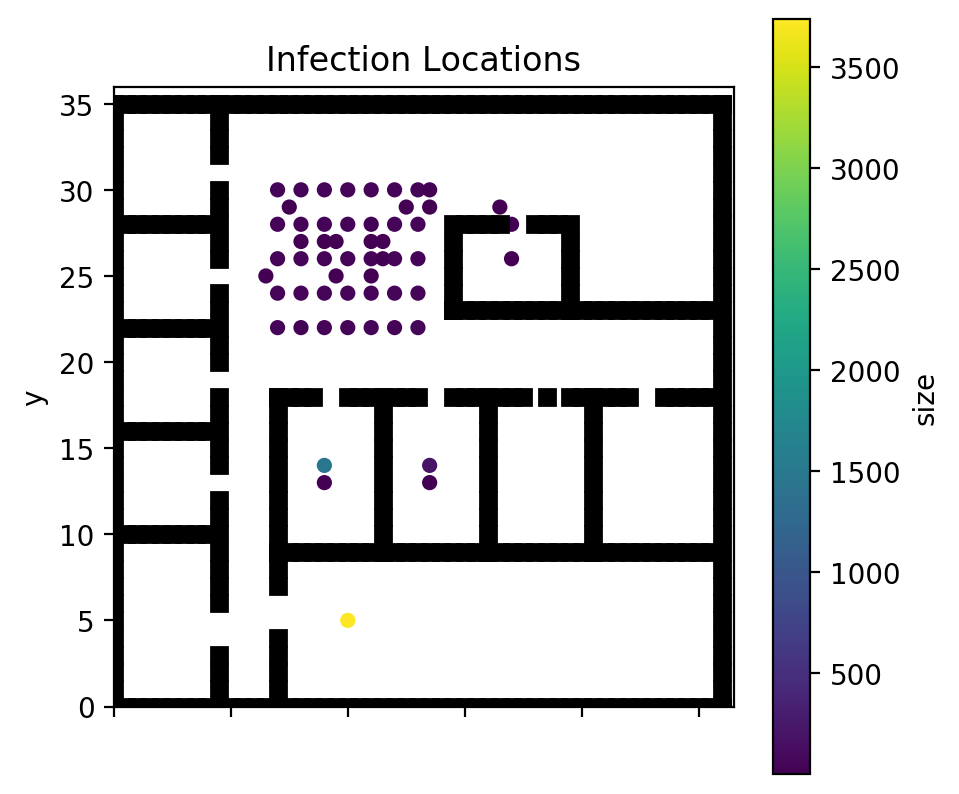

In [15]:
df = pd.concat([agents.patients, agents.staff])
oc = df[['infect_location.x', 'infect_location.y']]
oc = oc.rename(columns={'infect_location.x' : 'x', 'infect_location.y' : 'y'})
oc = oc[(oc['x'] != 0.0) | (oc['y'] != 0.0)]
oc = oc.groupby(['x', 'y'], as_index=False).size()
ax = oc.plot.scatter(x='x', y='y', c='size', colormap='viridis',
                     xlim=(0, hospital.dimensions[0]),
                     ylim=(0, hospital.dimensions[1]),
                     title='Infection Locations'
                     )
ax.set_aspect(hospital.dimensions[0] / hospital.dimensions[1])
# Agregar las paredes
x_axis = []
y_axis = []

for e in hospital.elements:
    if isinstance(e, sim.Wall):
        x_axis.append(e.location.x)
        y_axis.append(e.location.y)
ax.plot(x_axis, y_axis, 'ks')

In [16]:
dead = agents.patients[agents.patients.last_state ==  'MORGUE'].dropna(axis='columns')
dead['in_hospital'] = dead['exit_time'] - dead['entry_time']
dead['walking_time'] = dead['in_hospital'] - dead['sleep_time']
dead['walking_time'].describe()

count                          950
mean     0 days 00:54:28.768421052
std      0 days 00:47:06.251815498
min                0 days 00:23:50
25%                0 days 00:25:00
50%                0 days 00:26:45
75%                0 days 01:10:30
max                0 days 03:25:30
Name: walking_time, dtype: object

WAIT_IN_DOCTOR    58817
LEAVE_ICU          2700
NO_ATTENTION       1257
MORGUE              950
WAIT_ICU            823
WAIT_CHAIR_1        181
                     90
WAIT_CHAIR_2         41
WAIT_CHAIR_3         10
Name: last_state, dtype: int64


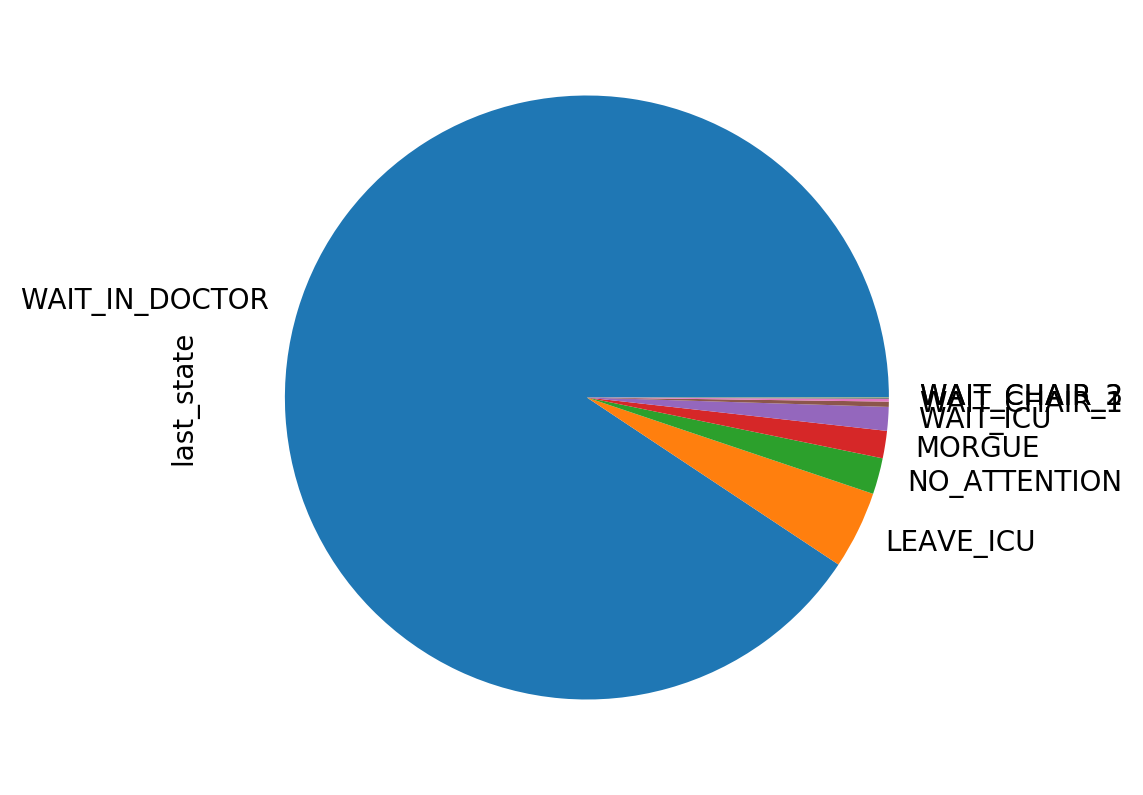

In [17]:
print(agents.patients['last_state'].value_counts())
agents.patients['last_state'].value_counts().plot(kind='pie')

In [18]:
df = pd.concat([agents.patients, agents.staff])

In [19]:
df = df[df['infected_by'] != '']
itime = df['incubation_end'] - df['infection_time']

In [20]:
print(itime.describe())

count                         6771
mean     3 days 07:26:34.558263181
std      1 days 13:44:34.092490061
min                0 days 14:02:15
25%         1 days 21:57:40.500000
50%                3 days 07:36:44
75%                4 days 16:10:24
max                5 days 23:58:35
dtype: object


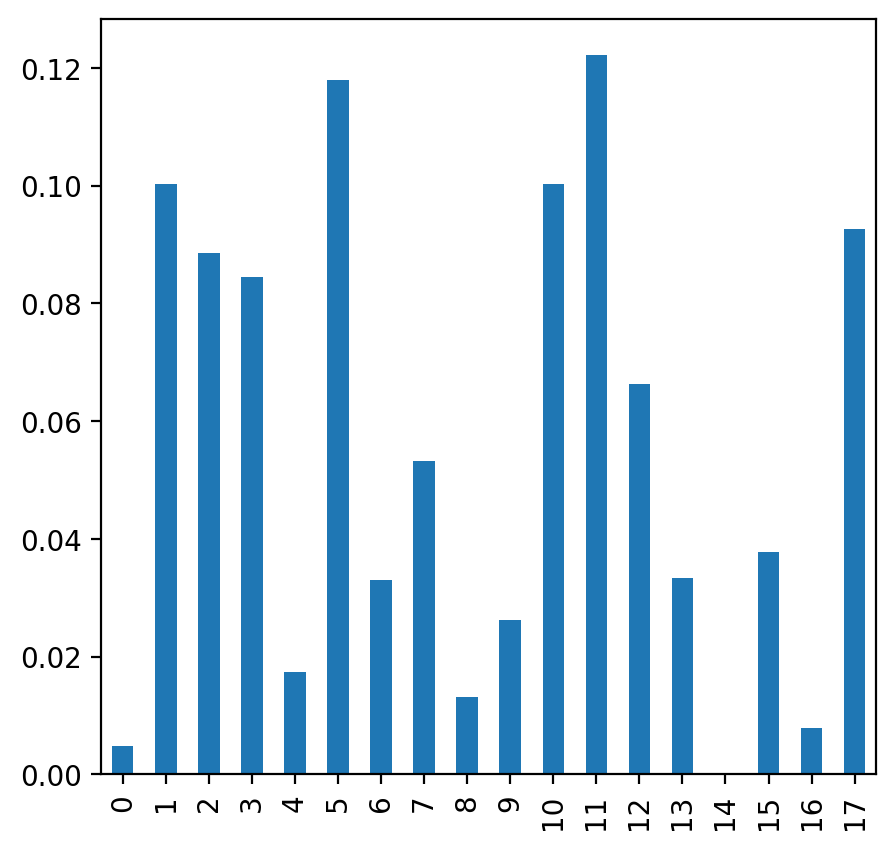

In [21]:
sleep_probs = [0.004748328, 0.100224175, 0.088623115, 0.084432757, 0.017333166, 0.117953925, 0.032968386, 0.053206605, 0.013086353, 0.026187069, 0.100335789, 0.122177398, 0.066380434, 0.033379033, 1.7555e-05, 0.037753818, 0.007899849, 0.092694777]
pd.Series(sleep_probs).plot(kind='bar')

In [22]:
df = agents.patients

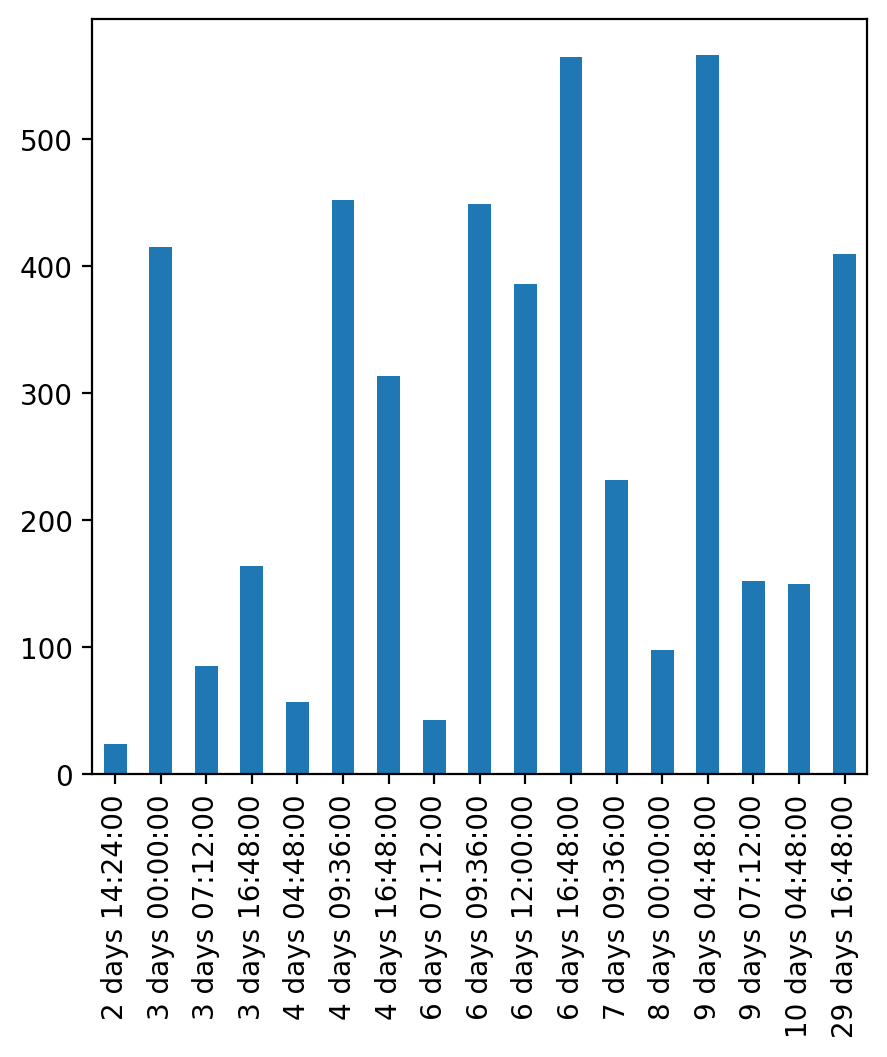

In [23]:
sleeps = df[~df['sleep_time'].isna()]['sleep_time'].value_counts().sort_index().plot(kind='bar')

Infected: 6769
Total: 64869
Top 5 offenders:
               58100
human.1.0.0     1463
human.2.0.0      192
bed.0.1           53
chair.1.4         52
Name: infected_by, dtype: int64
   repast_id     type        entry_time exit_time last_state  process  \
3  64793.1.1  patient 364 days 13:17:50       NaT                   0   

      infection_id infection_model infection_mode infection_stage  ...  \
3  human.64793.1.1           human         normal      incubating  ...   

       infected_by infect_location.x  infect_location.y    incubation_end  \
3  icu_environment              20.0                5.0 370 days 06:48:55   

  diagnosis_type doctor_specialty triage_level  attention_datetime_limit  \
3            icu              NaN          NaN                       NaT   

       sleep_time survives  
3 4 days 09:36:00    False  

[1 rows x 21 columns]


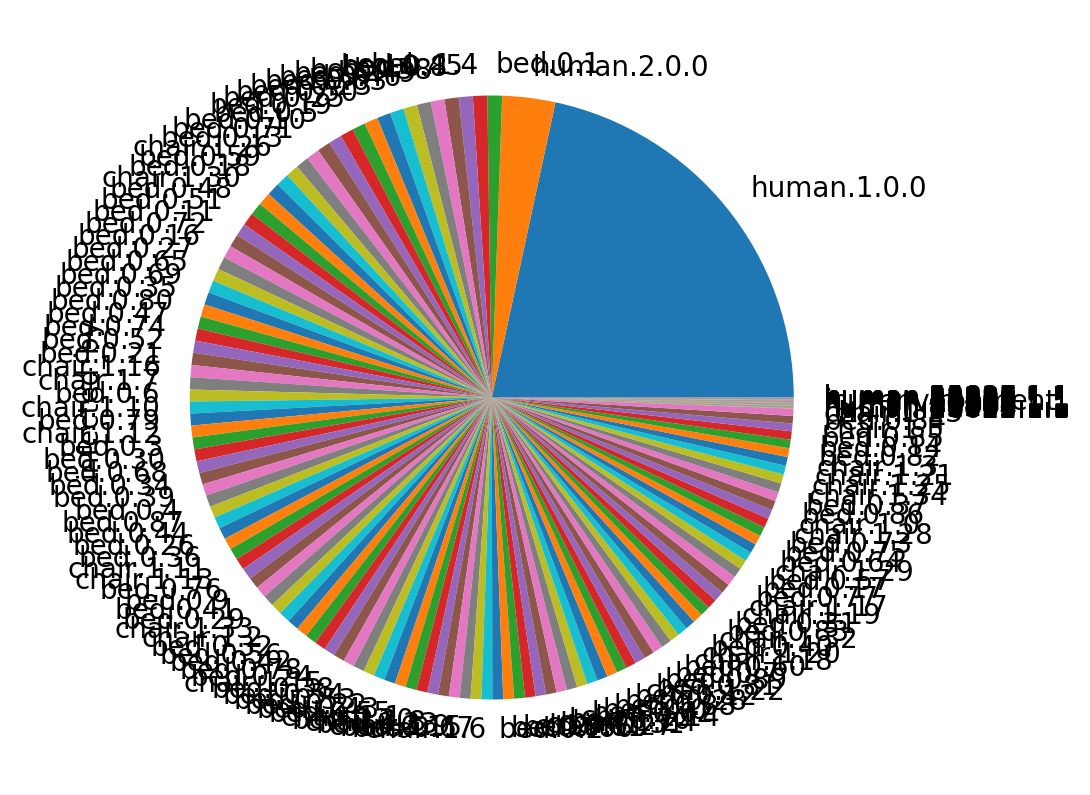

In [24]:
p = agents.patients
print(f"Infected: {p[p['infected_by'] != '']['infected_by'].count()}")
print(f"Total: {hospital.parameters['patient']['influx'].sum()}")
p[p['infected_by'] != '']['infected_by'].value_counts().plot.pie()
topn = 5
print(f"Top {topn} offenders:")
print(p['infected_by'].value_counts().sort_values(ascending=False).head(topn))
print(p[p['infected_by'] == 'icu_environment'])

In [25]:
agents.dataframe[agents.dataframe['infection_id'] == 'human.1.1.0']

,repast_id,type,entry_time,last_state,infection_id,infection_model,infection_mode,infection_stage,infection_time,incubation_end,...,infect_location.y,diagnosis_type,doctor_specialty,triage_level,attention_datetime_limit,process,sleep_time,survives,exit_time,infections
1,1.1.0,general_practitioner,NaT,NaN,human.1.1.0,human,immune,healthy,0 days,0 days,...,0.0,NaN,NaN,NaN,NaT,1,NaT,NaN,NaT,NaN
